In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


data = pd.read_csv("./autos.csv")
data.head()

,symboling,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9,111,5000,21,27,13495
1,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9,111,5000,21,27,16500
2,1,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9,154,5000,19,26,16500
3,2,audi,gas,std,4,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10,102,5500,24,30,13950
4,2,audi,gas,std,4,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8,115,5500,18,22,17450


In [47]:
y = data.price
X = data.drop(["price"], axis=1)

# label encoding
for col in X.select_dtypes("object"):
    X[col], _ = X[col].factorize()

discrete_features2 = [col for col in X.columns if X[col].dtype in ["int32", "int64"]]
discrete_features = X.dtypes == int

In [45]:
print(discrete_features2)
discrete_features


['symboling', 'make', 'fuel_type', 'aspiration', 'num_of_doors', 'body_style', 'drive_wheels', 'engine_location', 'curb_weight', 'engine_type', 'num_of_cylinders', 'engine_size', 'fuel_system', 'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg']


symboling            False
make                 False
fuel_type            False
aspiration           False
num_of_doors         False
body_style           False
drive_wheels         False
engine_location      False
wheel_base           False
length               False
width                False
height               False
curb_weight          False
engine_type          False
num_of_cylinders     False
engine_size          False
fuel_system          False
bore                 False
stroke               False
compression_ratio    False
horsepower           False
peak_rpm             False
city_mpg             False
highway_mpg          False
dtype: bool

In [60]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features):
    mi_score = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_score = pd.Series(mi_score, name="MI Score", index=X.columns)
    return mi_score.sort_values(ascending=False)

mi_scres = make_mi_scores(X, y, discrete_features)
    

In [56]:
mi_scres[::3]

curb_weight          0.913877
highway_mpg          0.882166
length               0.610944
fuel_system          0.466235
drive_wheels         0.333127
symboling            0.234534
compression_ratio    0.105642
body_style           0.047187
Name: MI Score, dtype: float64

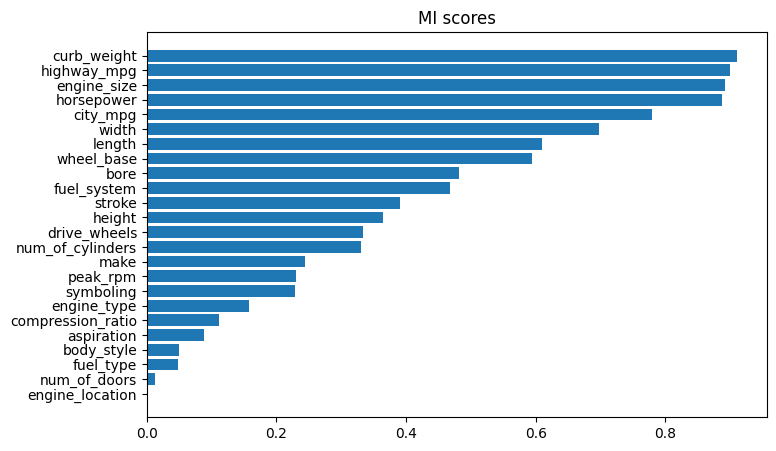

In [61]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("MI scores")

plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scres)

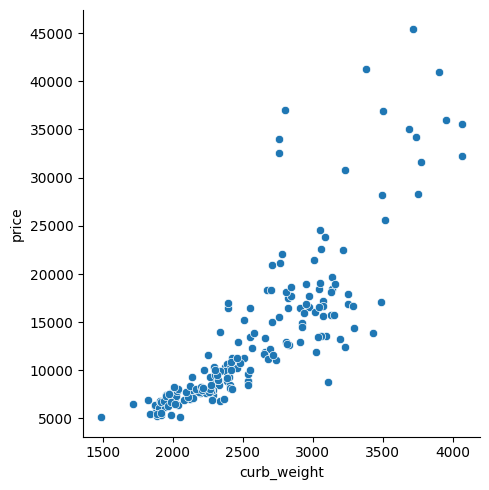

In [67]:
sns.relplot(x="curb_weight", y="price", data=data);

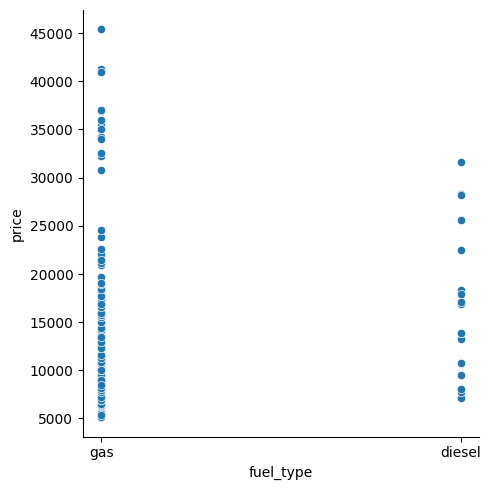

In [68]:
sns.relplot(x="fuel_type", y="price", data=data);


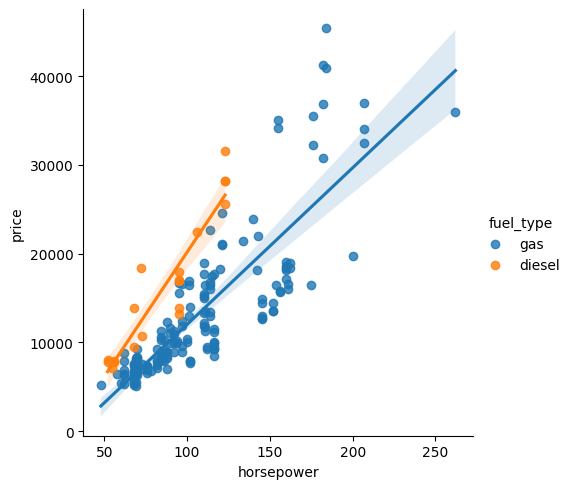

In [69]:
sns.lmplot(x="horsepower", y="price", hue="fuel_type", data=data)